Import the necessary libraries for statistical analysis and data visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

Load the data

In [2]:
with open("../data/authors.pickle", "rb") as p:
    authors = pickle.load(p)

with open("../data/psychotic_posts.pickle", "rb") as p:
    posts = pickle.load(p)

Get number of authors

In [3]:
len(authors)

89

Visualize distribution of author's self-identification flair

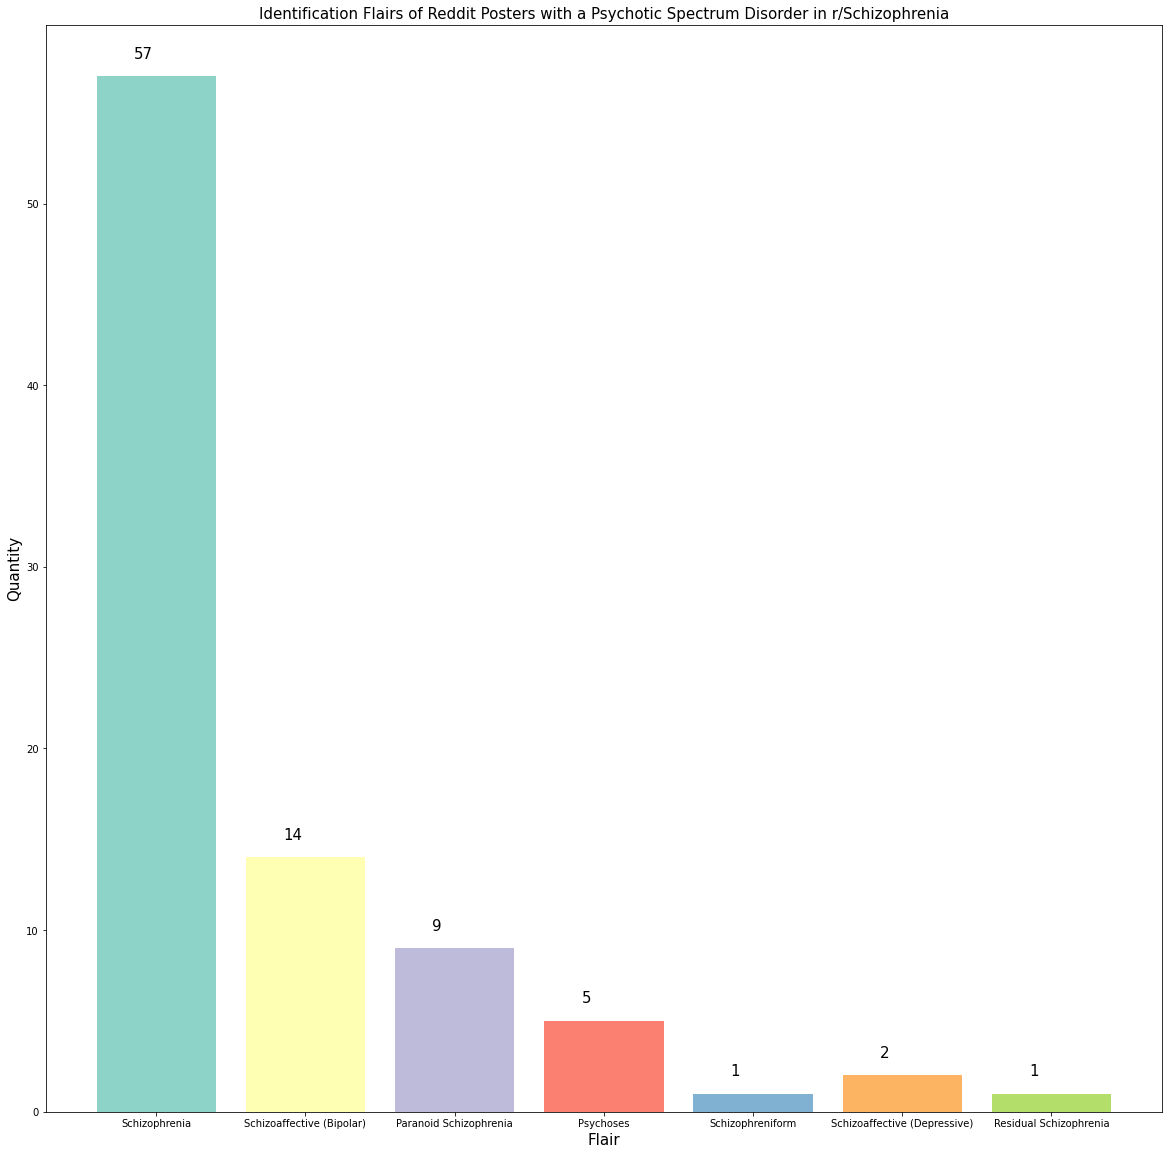

In [4]:
diagnosis = {}
for flair in authors.values():
    if flair not in diagnosis:
        diagnosis[flair] = 1
    else:
        diagnosis[flair] += 1

plt.figure(figsize=[20, 20])
pl = plt.bar(diagnosis.keys(), diagnosis.values(), color=plt.get_cmap("Set3").colors)
for bar in pl:
    plt.annotate(bar.get_height(), xy=(bar.get_x() + 0.25, bar.get_height() + 1), fontsize=15)
plt.title("Identification Flairs of Reddit Posters with a Psychotic Spectrum Disorder in r/Schizophrenia", fontsize=15)
plt.xlabel("Flair", fontsize=15)
plt.ylabel("Quantity", fontsize=15)
plt.show()

Get number of total posts and collect number of posts per author, number of tokens per post, and subreddits the posts were from

In [5]:
p = 0
num_posts_per_author = []
num_tokens_per_posts = []
subreddits = []
for post in posts.values():
    i = 0
    for pst in post:
        i += 1
        p += 1
        num_tokens_per_posts.append(pst["length"])
        subreddits.append(pst["subreddit"])
    num_posts_per_author.append(i)

print(p)

2420


Get the mean and standard deviation for the number of posts per author

In [6]:
print(np.mean(np.asarray(num_posts_per_author)))
print(np.std(np.asarray(num_posts_per_author)))

27.191011235955056
31.46922034805566


Create a histogram for number of posts per author

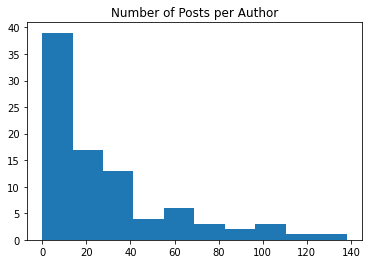

In [7]:
plt.hist(num_posts_per_author)
plt.title("Number of Posts per Author")
plt.show()

Get the mean and standard deviation for the number of tokens per post

In [8]:
print(np.mean(np.asarray(num_tokens_per_posts)))
print(np.std(np.asarray(num_tokens_per_posts)))

158.31198347107437
153.77612450561585


Create a histogram for the number of tokens per post

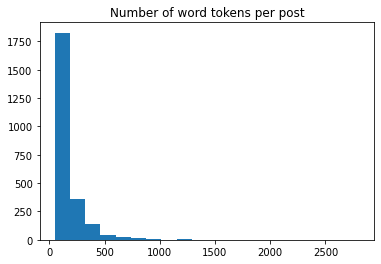

In [9]:
plt.hist(num_tokens_per_posts, bins=20)
plt.title("Number of word tokens per post")
plt.show()

Print 20 most common subreddits and their count

In [10]:
sr = {}
for s in subreddits:
    if s not in sr:
        sr[s] = 1
    else:
        sr[s] += 1

d = sorted(sr.items(), key=lambda kv:kv[1], reverse=True)

for i in range(20):
    print(d[i][0] + " " + str(d[i][1]))

schizophrenia 914
schizoaffective 109
Psychosis 94
autism 71
BipolarReddit 48
SuicideWatch 33
2007scape 25
homeless 23
MuslimMarriage 23
mentalillness 22
Denmark 21
medicine 20
Tulpas 19
bipolar 18
plural 17
WhereAreAllTheGoodMen 17
aspergers 16
BPD 16
relationship_advice 16
NPD 15
